# First part of project

### <font color=red>1-Make a random SAW with length of l</font>

#### function to make a n*n lattice

In [1]:
import numpy as np
import pylab 
import csv
import math

def make_square_lattice(n):
    square_lattice = np.zeros((n,n),dtype='int8')
    return square_lattice

function to make a SAW with length of l

start from center of the lattice

In [2]:
def make_random_SAW(lattice,length):
    #setting up
    points = np.zeros((length+1,2),dtype='int8')
    x_dim,y_dim = lattice.shape
    p_x,p_y = x_dim//2,y_dim//2
    points[0] = [p_x,p_y]
    lattice[p_x][p_y] = 1
    #current_saw_length = 0
    for current_saw_length in range(1,length+1):
        #check if it's impossible
        if(lattice[p_x+1][p_y]==1 and lattice[p_x-1][p_y]==1 and lattice[p_x][p_y+1]==1 and lattice[p_x][p_y-1]==1):
            return (False,lattice,points)
        #it's possible so force to find it
        is_find = False
        while(not is_find):
            direction = np.random.randint(0,4)# 0-> up | 1-> down | 2-> right | 3-> left
            if(direction == 0):
                if(lattice[p_x-1][p_y] != 1):
                    lattice[p_x-1][p_y] = 1
                    p_x = p_x-1
                    is_find = True
            elif(direction == 1):
                if(lattice[p_x+1][p_y] != 1):
                    lattice[p_x+1][p_y] = 1
                    p_x = p_x+1
                    is_find = True    
            elif(direction == 2):
                if(lattice[p_x][p_y+1] != 1):
                    lattice[p_x][p_y+1] = 1
                    p_y = p_y+1
                    is_find = True
            elif(direction == 3):
                if(lattice[p_x][p_y-1] != 1):
                    lattice[p_x][p_y-1] = 1
                    p_y = p_y-1
                    is_find = True
            points[current_saw_length] = [p_x,p_y]
            #print(lattice)
    return(True,lattice,points)
            

In [3]:
def points_graph(points):
    xs = points[:,0]
    ys = points[:,1]

    pylab.title("Random Walk 2-D")
    pylab.plot(xs, ys) #plotting the walk.
    pylab.grid()
    pylab.show()

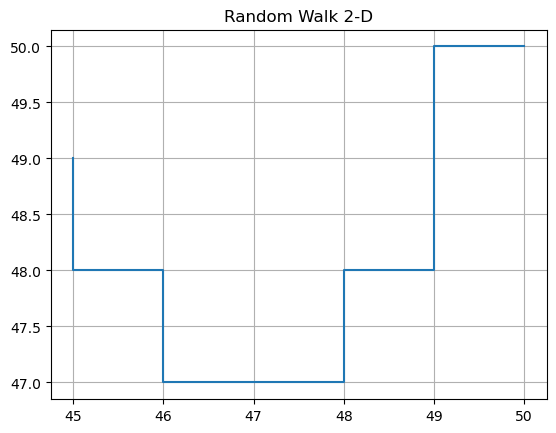

In [7]:
a = make_square_lattice(100)
x = make_random_SAW(a,10)


while(x[0] == False):
    x = make_random_SAW(a,10)

xs = x[2][:,0]
ys = x[2][:,1]

pylab.title("Random Walk 2-D")
pylab.plot(xs, ys) #plotting the walk.
pylab.grid()
pylab.show()


Choose a random pivot and then rotate it 90 

In [4]:
def pivot_rotate(points):
    saw_length = len(points)
    pivot_index = np.random.randint(0,saw_length)
    pivot_point = points[pivot_index]
    #Rotation
    #For rotation we first find relative coordinates to pivot for points after pivot then rotate it using rotation matrix then add it to pivot coordinate
    ra = np.random.randint(0,3)
    for point_index in range(pivot_index,saw_length):
        #find relative coordinate
        R_coordinate_x,R_coordinate_y = points[point_index][0]-pivot_point[0],points[point_index][1]-pivot_point[1]
        #rotation by 90 degree counter clock-wise or clock-wise or reflection randomly with equal probability
        if (ra == 0):
            new_x = R_coordinate_y
            new_y = -R_coordinate_x
        elif(ra == 1):
            new_x = -R_coordinate_y
            new_y = R_coordinate_x
        else:
            new_x = -R_coordinate_x
            new_y = -R_coordinate_y
                
        points[point_index] = [pivot_point[0]+new_x,pivot_point[1]+new_y]
    return points

def is_valid(points):
    for i in range(len(points)-1):
        for j in range(i+1,len(points)):
            if(points[i][0]==points[j][0] and points[i][1]==points[j][1]):
                return False
    return True

def is_duplicate(walks,points):
    for i in range(len(walks)):
        if(is_duplicate_two_array(walks[i],points)==False):
            return False
    return True

def is_duplicate_two_array(points1,points2):
    for i in range(len(points1)):
        if (not np.allclose(points1[i],points2[i])):
            return True
    return False

def cal_Re(points):
    start_x = points[0][0]
    start_y = points[0][1]
    end_x = points[-1][0]
    end_y = points[-1][1]        
    Re = ((start_x-end_x)**2+(start_y-end_y)**2)**0.5
    return Re

def cal_Rg(points):
    Rg_sum = 0
    for first_point_index in range(len(points)):
        for second_point_index in range(first_point_index,len(points)):
            distance = ((points[first_point_index][0]-points[second_point_index][0])**2 + (points[first_point_index][1]-points[second_point_index][1])**2)**0.5
            Rg_sum += distance
    return Rg_sum/(2*(len(points)-1)**2)

### counting numbers of saw's

In [46]:
walks = []
square_lattice = make_square_lattice(18)
first_saw = make_random_SAW(square_lattice,6)
walks.append(first_saw[2])
y = first_saw[2]
for i in range(1000):
    square_lattice = make_square_lattice(18)
    temp = make_random_SAW(square_lattice,6)
    if(is_duplicate(walks,temp[2])):
        walks.append(temp[2])
        #points_graph(temp[2])
print(len(walks))

548


[[1, 4]]
[]
[[1, 0.5]]


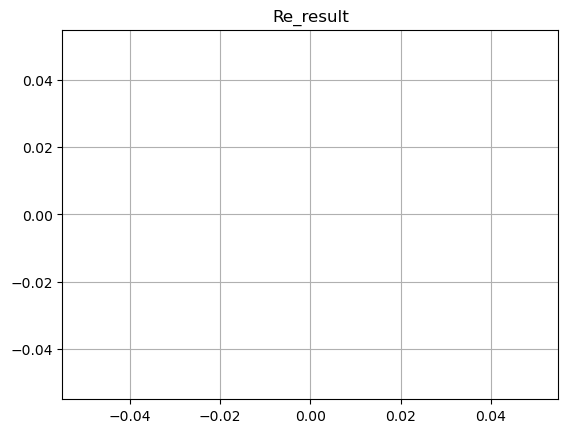

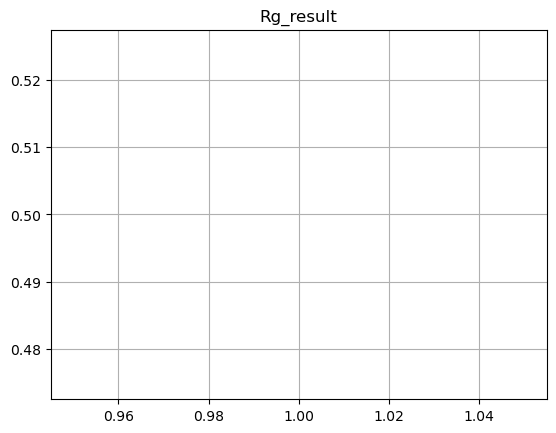

In [25]:
iteration = 5000
maximum_length = 2
result = []
Re_result = []
Rg_result = []
for length in range(1,maximum_length):
    #Save path's for diffrent lengths of our polymer
    mFile = open(mFile_name, "a")
    mFile_name = 'array_result_length' + str(length)
    square_lattice = make_square_lattice(2*length+1)
    saw = make_random_SAW(square_lattice,length)
    mFile.write(str(saw[2])+',')
    saw_numbers = 1
    Re_sum = cal_Re(saw[2])
    Rg_sum = cal_Rg(saw[2])
    walks = []
    walks.append(saw[2])
    temp_point = np.array(saw[2])
    for i in range(iteration):
        copy_points = temp_point.copy()
        new_saw = pivot_rotate(copy_points)
        if(is_valid(new_saw) and is_duplicate(walks,new_saw)):
            walks.append(new_saw)
            temp_point = new_saw
            Re_sum += cal_Re(temp_point)
            Rg_sum += cal_Rg(temp_point)
            saw_numbers = saw_numbers+1
            mFile.write(str(temp_point)+',')
    Re_result.append([length,Re_sum/saw_numbers])
    Rg_result.append([length,Rg_sum/saw_numbers])
    result.append([length,saw_numbers])
    mFile.close()
    
print(result)
print(Re_result)
print(Rg_result)

xs = [i[0] for i in Re_result]
ys = [i[1] for i in Re_result]

pylab.title("Re_result")
pylab.plot(xs, ys) 
pylab.grid()
pylab.show()

xs = [i[0] for i in Rg_result]
ys = [i[1] for i in Rg_result]

pylab.title("Rg_result")
pylab.plot(xs, ys) 
pylab.grid()
pylab.show()

            


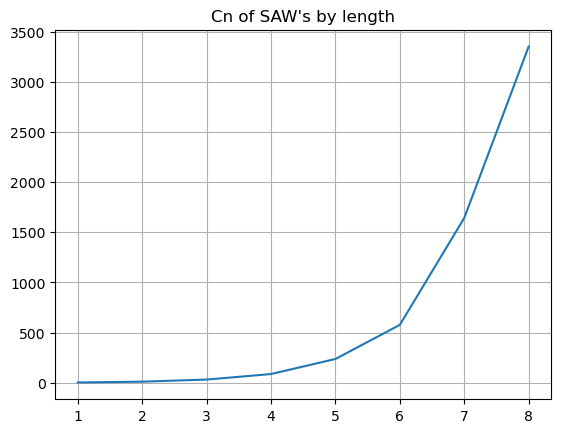

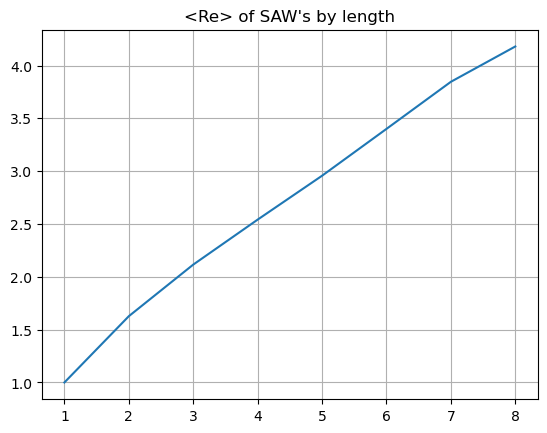

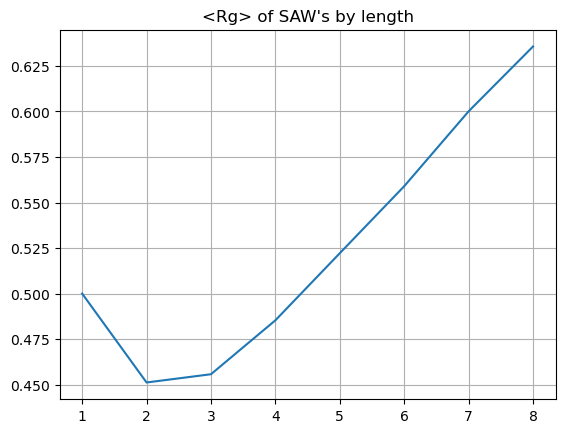

In [10]:

my_cn_result = [[1,4],[2,12],[3,33],[4,88],[5,238],[6,578],[7,1643],[8,3351]]
my_re_result = [[1,1],[2,1.6272268124192424],[3,2.1155008937498563],[4,2.5413129915702695],[5,2.9567832855140934],[6,3.4001046114711047],[7,3.8458633285917925],[8,4.180116705001903]]
my_rg_result = [[1,0.5],[2,0.45118446353109115],[3,0.45571503417325293],[4,0.4853225963935609],[5,0.5221693444778603],[6,0.5589594611640433],[7,0.6000844223870588],[8,0.635675950348339]]

xs_cn = [i[0] for i in my_cn_result]
ys_cn = [i[1] for i in my_cn_result]
xs_re = [i[0] for i in my_re_result]
ys_re = [i[1] for i in my_re_result]
xs_rg = [i[0] for i in my_rg_result]
ys_rg = [i[1] for i in my_rg_result]

pylab.title("Cn of SAW's by length")
pylab.plot(xs_cn, ys_cn) 
pylab.grid()
pylab.show()

pylab.title("<Re> of SAW's by length")
pylab.plot(xs_re, ys_re) 
pylab.grid()
pylab.show()

pylab.title("<Rg> of SAW's by length")
pylab.plot(xs_rg, ys_rg) 
pylab.grid()
pylab.show()



In [11]:
real_result_cn = [[1,4],[2,12],[3,36],[4,100],[5,284],[6,780],[7,2172],[8,5916]]


### error of Cn

4
4
12
12
36
33
100
88
284
238
780
578
2172
1643
5916
3351
[[1, 0.0], [2, 0.0], [3, 8.333333333333332], [4, 12.0], [5, 16.19718309859155], [6, 25.8974358974359], [7, 24.355432780847146], [8, 43.35699797160243]]


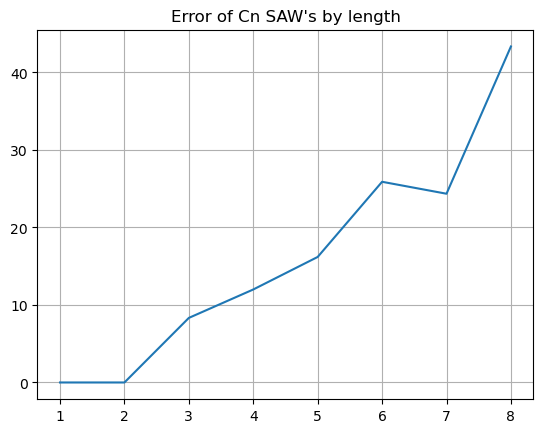

In [12]:
error_of_cn = []
for length in range(len(real_result_cn)):
    print(real_result_cn[length][1])
    print(my_cn_result[length][1])
    relative_error = abs(real_result_cn[length][1]-my_cn_result[length][1])/(real_result_cn[length][1])*100
    error_of_cn.append([length+1,relative_error])
xs_error = [i[0] for i in error_of_cn]
ys_error = [i[1] for i in error_of_cn]

print(error_of_cn)
pylab.title("Error of Cn SAW's by length")
pylab.plot(xs_error, ys_error) 
pylab.grid()
pylab.show()

### Calculation of µ

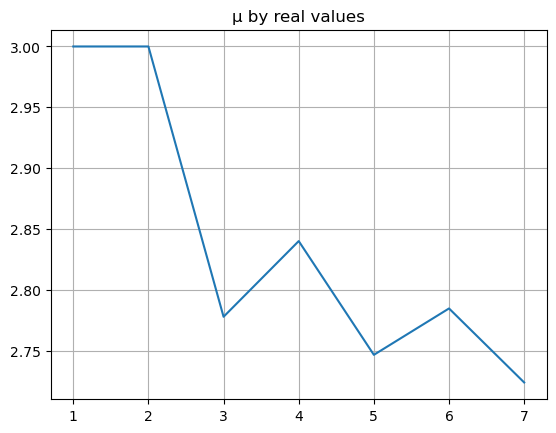

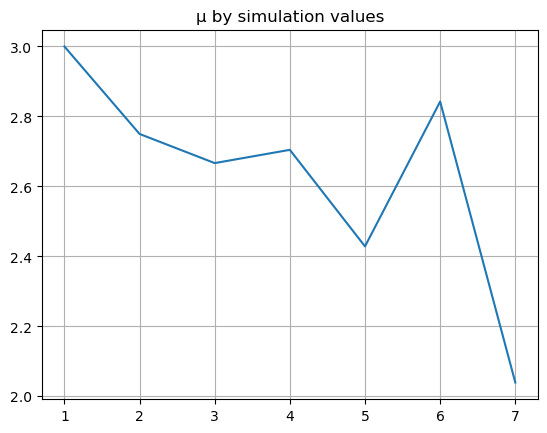

In [13]:
real_mu = []
for length in range(len(real_result_cn)-1):
    mu = real_result_cn[length+1][1]/real_result_cn[length][1]
    real_mu.append([length+1,mu])
my_mu = []
for length in range(len(my_cn_result)-1):
    mu = my_cn_result[length+1][1]/my_cn_result[length][1]
    my_mu.append([length+1,mu])
    
real_mu_x = [i[0] for i in real_mu]
real_mu_y = [i[1] for i in real_mu]

my_mu_x = [i[0] for i in my_mu]
my_mu_y = [i[1] for i in my_mu]

pylab.title("µ by real values")
pylab.plot(real_mu_x, real_mu_y) 
pylab.grid()
pylab.show()

pylab.title("µ by simulation values")
pylab.plot(my_mu_x,my_mu_y)
pylab.grid()
pylab.show()

### Calculation of ν

1.6272268124192424 2
2.1155008937498563 3
2.5413129915702695 4
2.9567832855140934 5
3.4001046114711047 6
3.8458633285917925 7
4.180116705001903 8


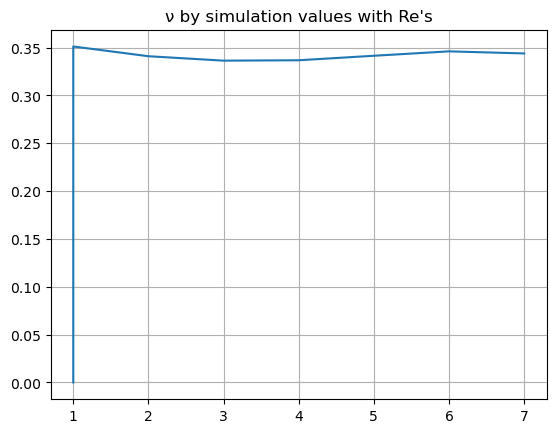

In [14]:
my_nu_result = [[1,0]]
for length in range(1,len(my_re_result)):
    print(my_re_result[length][1],length+1)
    nu = math.log(my_re_result[length][1],length+1)/2
    my_nu_result.append([length,nu])
    
my_nu_x = [i[0] for i in my_nu_result]
my_nu_y = [i[1] for i in my_nu_result]

pylab.title("ν by simulation values with Re's")
pylab.plot(my_nu_x, my_nu_y) 
pylab.grid()
pylab.show()

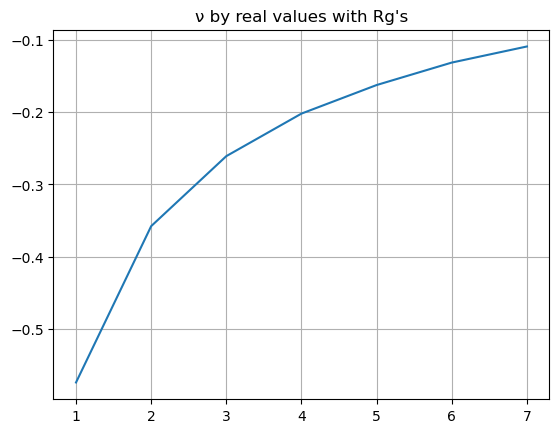

In [48]:
my_nu_result = []
for length in range(1,len(my_rg_result)):
    nu = math.log(my_rg_result[length][1],length+1)/2
    my_nu_result.append([length,nu])
    
my_nu_x = [i[0] for i in my_nu_result]
my_nu_y = [i[1] for i in my_nu_result]

pylab.title("ν by real values with Rg's")
pylab.plot(my_nu_x, my_nu_y) 
pylab.grid()
pylab.show()

### Calculation of S

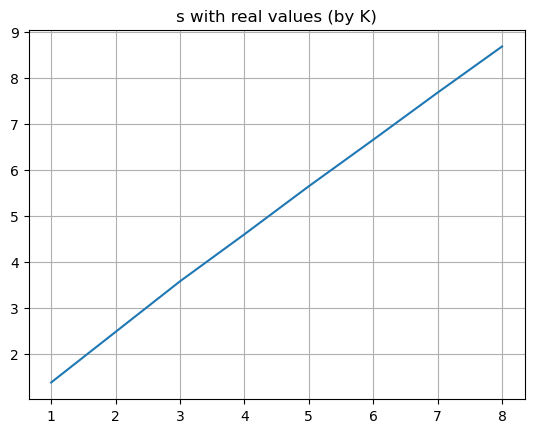

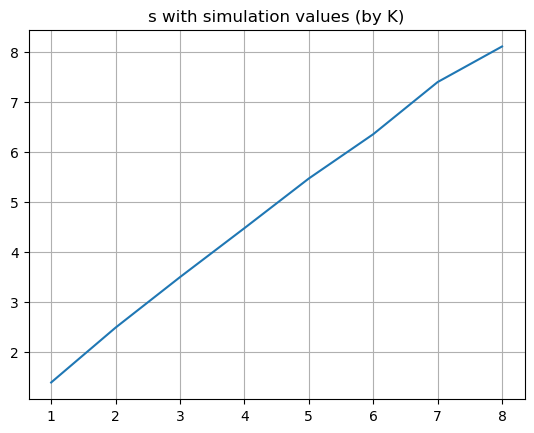

In [16]:
real_s = []
for length in range(len(real_result_cn)):
    s = math.log(real_result_cn[length][1],math.e)
    real_s.append([length+1,s])
my_s = []
for length in range(len(my_cn_result)):
    s = math.log(my_cn_result[length][1],math.e)
    my_s.append([length+1,s])
    
real_s_x = [i[0] for i in real_s]
real_s_y = [i[1] for i in real_s]

my_s_x = [i[0] for i in my_s]
my_s_y = [i[1] for i in my_s]

pylab.title("s with real values (by K)")
pylab.plot(real_s_x, real_s_y) 
pylab.grid()
pylab.show()

pylab.title("s with simulation values (by K)")
pylab.plot(my_s_x,my_s_y)
pylab.grid()
pylab.show()

In [ ]:
real_cn_x = [1,2,3,4,5,6,7,8]
real_cn_y = [i[1] for i in real_s]

my_cn_x = [i[0] for i in my_s]
my_cn_y = [i[1] for i in my_s]

pylab.title("s by real values")
pylab.plot(real_s_x, real_s_y) 
pylab.grid()
pylab.show()

pylab.title("s by simulation values")
pylab.plot(my_s_x,my_s_y)
pylab.grid()
pylab.show()